# Importing packages 

In [2]:
import numpy as np
import random
#import scipy.stats
# from scipy.stats import poisson
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits import mplot3d
## %matplotlib widget

## from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# Finding $ \lambda_k $ and Generating Synthetic data

## For loop for $ \lambda_k $ and $ \Delta N_k $

Generating a synthetic data using a **FOR-LOOP** using the following iteration

$ \lambda_0 = \mu  $       
   then $ \Delta N_0 \thicksim Poi(\lambda_0) $

$ \lambda_1 = \mu + \alpha \Delta N_0  $     
   then $ \Delta N_1 \thicksim Poi(\lambda_1) $

$ \lambda_2 = \mu + \gamma \alpha \Delta N_0 + \alpha \Delta N_1  $    
   then $ \Delta N_2 \thicksim Poi(\lambda_2) $
   
$ \lambda_3 = \mu + \gamma^2 \alpha \Delta N_0 + \gamma \alpha \Delta N_1 + \alpha \Delta N_2 $    
   then $ \Delta N_3 \thicksim Poi(\lambda_3) $


***Note: The loop doesn't work for $ \mu > \lambda $ which makes sense as we are not taking anything away in the function.***


$ \lambda_0 = \mu  \ \ \rightarrow \ \ \Delta N_0 \sim Poi(\lambda_0) $

$ \lambda_1 =  \gamma (\lambda_0 -\mu )+  \mu + \alpha \Delta N_0   \ \ \rightarrow \ \ \Delta N_1 \sim Poi(\lambda_1) $

$ \lambda_2 =  \gamma (\lambda_1 -\mu )+  \mu + \alpha \Delta N_1   \ \ \rightarrow \ \ \Delta N_2 \sim Poi(\lambda_2) $

$\cdots $

# Function to Generate data



In [3]:
def create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):

    # fixing the randomness
    np.random.seed(rnd_seed)
    
    Lambda_ = np.zeros(n+1)
    
    # First lambda(0) = mu
    Lambda_[0] = mu ## adding the first lambda_k = mu

    # Delta_n and lambda_n empty lists
    Delta_n = np.zeros(n) ## adding a dummy data point    
    
    #Generating the lambda function and synthetic data
    for i in range(0,n):

        # draw from poisson distribution
        Delta_n[i] = np.random.poisson(Lambda_[i], size=1)

        # update lambda k+1
        Lambda_[i+1] = gamma*(Lambda_[i] - mu) + mu + alpha*Delta_n[i]
    
    return Lambda_, Delta_n

## Testing the function and plotting the data 

In [9]:
# create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha ):

n0 = 100
rnd_seed = 1
mu0 = 2
gamma0 = 0.1
alpha0 = 0.5

Lambda0_, Delta0_n = create_synthetic_data_for_loop(n0, rnd_seed, mu0, gamma0, alpha0)

for i in range(0,n0):
  print( "Delta_n = {} and Lambdas ={}".format(Delta0_n[i],Lambda0_[i]))

Delta_n = 2.0 and Lambdas =2.0
Delta_n = 1.0 and Lambdas =3.0
Delta_n = 1.0 and Lambdas =2.6
Delta_n = 2.0 and Lambdas =2.56
Delta_n = 4.0 and Lambdas =3.056
Delta_n = 4.0 and Lambdas =4.1056
Delta_n = 6.0 and Lambdas =4.21056
Delta_n = 3.0 and Lambdas =5.221056
Delta_n = 7.0 and Lambdas =3.8221056
Delta_n = 8.0 and Lambdas =5.68221056
Delta_n = 2.0 and Lambdas =6.368221055999999
Delta_n = 3.0 and Lambdas =3.4368221056
Delta_n = 2.0 and Lambdas =3.64368221056
Delta_n = 2.0 and Lambdas =3.164368221056
Delta_n = 3.0 and Lambdas =3.1164368221056
Delta_n = 6.0 and Lambdas =3.61164368221056
Delta_n = 5.0 and Lambdas =5.161164368221057
Delta_n = 9.0 and Lambdas =4.816116436822106
Delta_n = 7.0 and Lambdas =6.7816116436822105
Delta_n = 2.0 and Lambdas =5.978161164368221
Delta_n = 5.0 and Lambdas =3.397816116436822
Delta_n = 2.0 and Lambdas =4.6397816116436825
Delta_n = 3.0 and Lambdas =3.2639781611643683
Delta_n = 4.0 and Lambdas =3.626397816116437
Delta_n = 3.0 and Lambdas =4.162639781611643

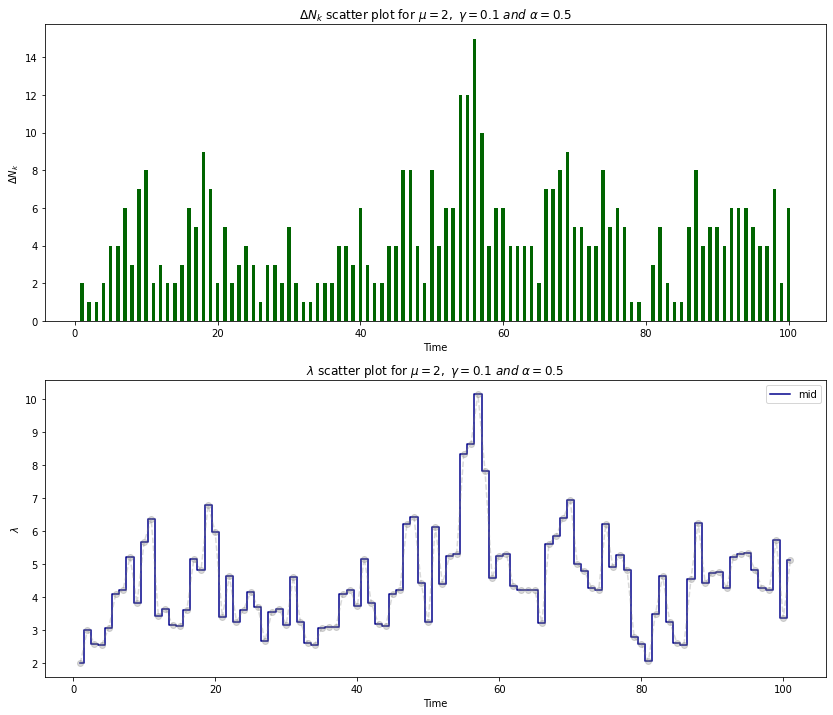

In [10]:
plt.figure( figsize = (14,12))

# subplot 1
plt.subplot(211)

x1 = range(1,n0+1)

plt.bar(x1, Delta0_n[0:] ,  width=0.5,  color = 'darkgreen')

plt.title(r'$\Delta N_k $ scatter plot for $ \mu = {} , \ \gamma = {} \ and \ \alpha = {}  $'.format(mu0,gamma0, alpha0))
plt.xlabel('Time')
plt.ylabel('$ \Delta N_k$');
;

# subplot 2
plt.subplot(212)

# Step function 
x2 = range(1,n0+2)

plt.step(x2, Lambda0_, color='darkblue', where='mid' , label = 'mid')  # label='pre (default)')
plt.plot(x2, Lambda0_, 'o--', color='grey', alpha=0.3)

plt.title(r'$\lambda $ scatter plot for $ \mu = {} , \ \gamma = {} \ and \ \alpha = {}  $'.format(mu0,gamma0, alpha0))
plt.xlabel('Time')
plt.legend()
plt.ylabel('$ \lambda$');

There is a large difference in the way the data looks like given : *small gamma and large alpha* **vs** *larger gamma with smaller alpha.*

But how small is 'small' for gamma and how large is 'large' for alpha? 

# Testing alpha and gamma's relationship for t goes to infinity 



1,000 data points for small gamma = 0.1 and different values of alpha from 0.1 to 0.9. 


In [ ]:
# Plotting data for different values of alpha
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.1)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.3)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.5)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.8)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.9)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


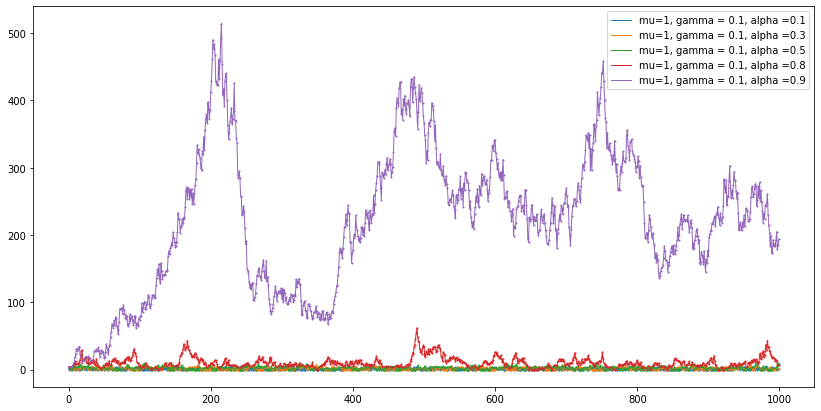

In [ ]:
# Looking at different values of alpha

fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.1")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.3")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.5")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.8")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.9")

plt.legend();

5,000 data points for testing alpha + gamma = 1.

Here gamma increases from 0.1 to 0.4 while gamma decreases from 0.9 to 0.6.

All but the last, red one (gamma = 0.4 and alpha = 0.6) have a similar relationship.

The growth rate for the last deltans is slower as alpha decreases.


In [ ]:
n=5000
Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.9)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.2, alpha =0.8)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.3, alpha =0.7)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.4, alpha =0.6)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.5, alpha =0.5)

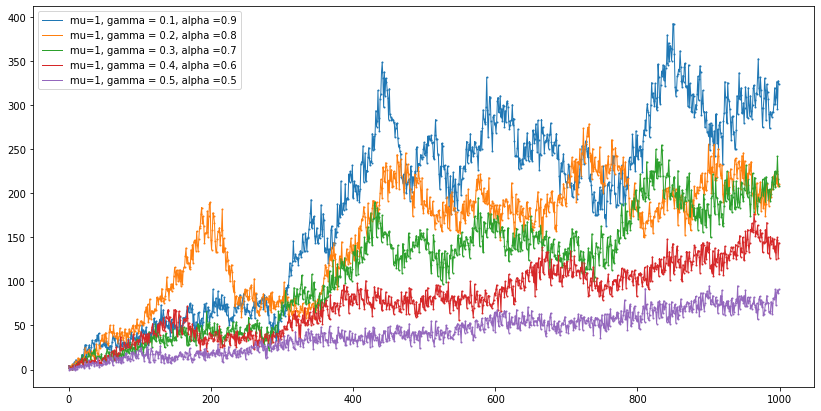

In [ ]:
# Looking at different values of alpha

fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.9")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.2, alpha =0.8")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.3, alpha =0.7")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.4, alpha =0.6")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.5, alpha =0.5")

plt.legend();

Investigating the behavour of the data for gamma > alpha and alpha + gamma = 1. Starting from gamma = alpha = 0.5.

We get the exact same chart we saw above where alpha > gamma and alpha + gamma = 1.

Why?

In [ ]:
# Plotting data for different values of gamma
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.5, alpha =0.5)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.6, alpha =0.4)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.7, alpha =0.3)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.8, alpha =0.2)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.9, alpha =0.1) # lambda is too large for anything beyond gamma=0.5

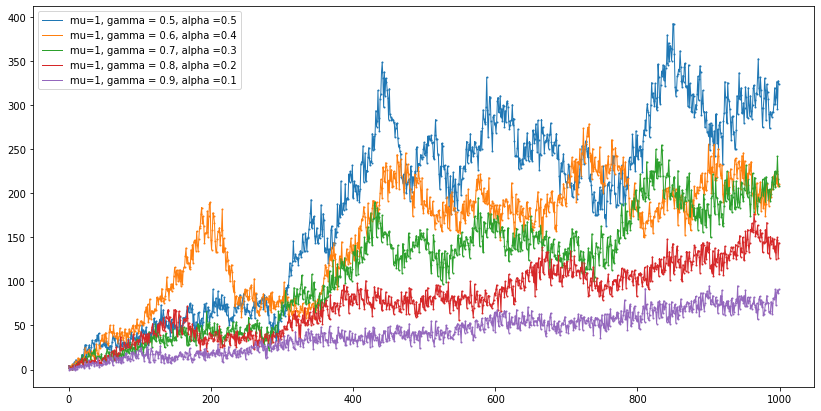

In [ ]:
fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.5, alpha =0.5")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.6, alpha =0.4")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.7, alpha =0.3")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.8, alpha =0.2")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.9, alpha =0.1")

plt.legend();

What about behavour when alpha + gamma not equal to 1 and alpha > gamma?

They show exponential growth behaviour with the fastest growth when alpha is large and slower when alpha is smaller but still larger than gamma.


In [ ]:
# Plotting data for different values of gamma
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.1, alpha =0.91)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.2, alpha =0.81)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.3, alpha =0.71)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.4, alpha =0.61)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.5, alpha =0.51) # lambda gets too large for values beyond 0.45

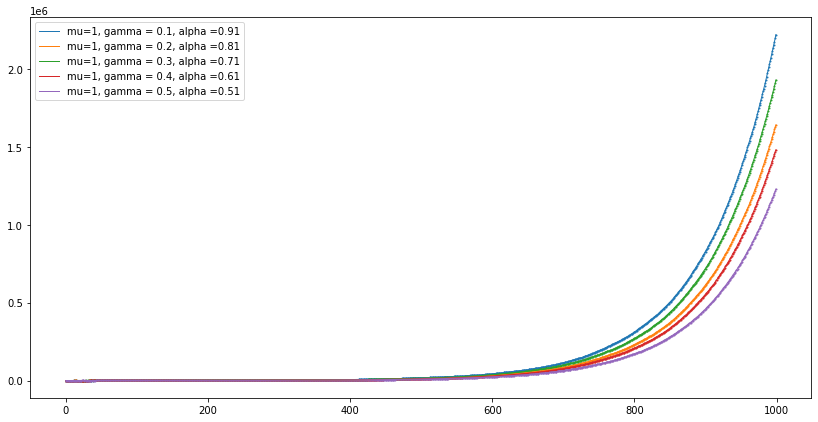

In [ ]:
fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.1, alpha =0.91")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.2, alpha =0.81")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.3, alpha =0.71")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.4, alpha =0.61")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.5, alpha =0.51")

plt.legend();

Do we see the same behaviour when we take gamma > alpha and alpha + gamma greater than 1?

Similar but not the same as before. Here we have a slower growth as alpha is smaller.

In [ ]:
# Plotting data for different values of gamma
n = 1000

Lambda1, Delta1 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.91, alpha =0.1)
Lambda2, Delta2 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.81, alpha =0.2)
Lambda3, Delta3 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.71, alpha =0.3)
Lambda4, Delta4 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.61, alpha =0.4)
Lambda5, Delta5 = create_synthetic_data_for_loop(n, rnd_seed=4, mu=1, gamma = 0.51, alpha =0.5) # lambda gets too large for values beyond 0.45

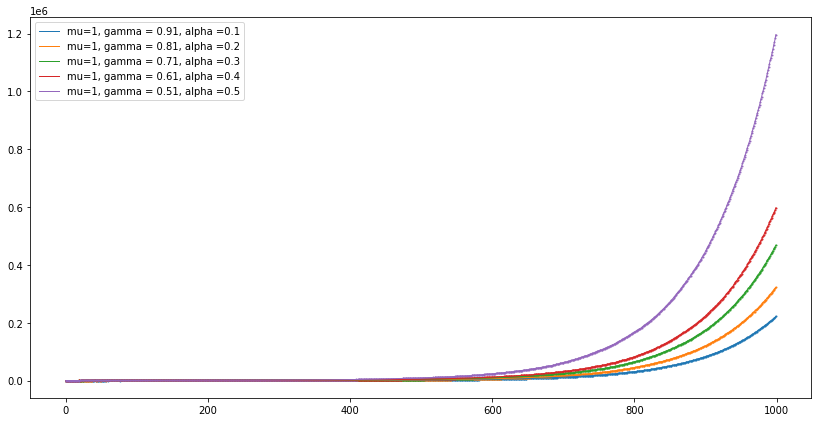

In [ ]:
fig = plt.figure(figsize=(14,7))

plt.scatter(range(0,n), Delta1, s=1)
plt.scatter(range(0,n), Delta2, s=1)
plt.scatter(range(0,n), Delta3, s=1)
plt.scatter(range(0,n), Delta4, s=1)
plt.scatter(range(0,n), Delta5, s=1)

plt.plot(range(0,n), Delta1, linewidth=1, label="mu=1, gamma = 0.91, alpha =0.1")
plt.plot(range(0,n), Delta2, linewidth=1, label="mu=1, gamma = 0.81, alpha =0.2")
plt.plot(range(0,n), Delta3, linewidth=1, label="mu=1, gamma = 0.71, alpha =0.3")
plt.plot(range(0,n), Delta4, linewidth=1, label="mu=1, gamma = 0.61, alpha =0.4")
plt.plot(range(0,n), Delta5, linewidth=1, label="mu=1, gamma = 0.51, alpha =0.5")

plt.legend();

# Using Synthetic data to find Negative Log-likelihood
## Generating 100 data points for the negative log-likelihood 

$ ln(L) \ = \ \sum_{k=1}^N \Delta N_k ln(\lambda_k) - \sum_{k=1}^N \lambda_k - \sum_{k=1}^N ln( \Delta N_k ! ) $

$ -Log ( L(\theta) ) =  - \sum^N_{k=1} \Delta N_k ln(\lambda_k) + \sum^N_{k=1} \lambda_k + \sum_{k=1}^N ln( \Delta N_k ! ) $

Here we have to use both the $ \Delta N_k $ and $\lambda $ that we created to find the -LL.

Our function ``` create_synthetic_data_for_loop(n, rnd_seed, mu, gamma, alpha)```

creates the arrays ```Delta_n``` and ```Lambda_k```

3D plot: https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html

In [39]:
## Generating Data 
# mu = 0.5 gamma = 0.1 alpha = 0.25

n = n0  ## samples
rnd_seed = 4
mu0 = 0.5
gamma0 = 0.1
alpha0 = 0.25

Lambda_, data = create_synthetic_data_for_loop(n, rnd_seed, mu0, gamma0, alpha0)

#data = np.squeeze(Delta_n, axis=1) ## data
data.size

100

## 3D Scatter and Negative Log-Likelihood generation

In [40]:
mu = np.linspace(0.1, 2, 10)  ## any number
alpha = np.linspace(0.1, 1, 10) # infection rate larger than 0
gamma = np.linspace(0.1, 0.9, 10)  # decay rate between 0 and 1

mm, aa, gg = np.meshgrid(mu, alpha, gamma)

In [41]:
## making an array for the lambdas 

l = mm.copy()

lambda_est = l - l

lambda_est ## empty array 

n = len(data)

l_list = [mm]

for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data[i]
    
    l_list.append(lambda_est)

   
#l_list[0]
#len(l_list) ## 100 values in list 
## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data[i], np.log(l_list[i]))
    
    ll_list.append(vals)
    
##ll_list

neg_log_like =  - sum(ll_list) + sum(l_list)

len(neg_log_like)
    

10

In [42]:
neg_log_like.shape
np.amin(neg_log_like)

## real parameters are
mu0,alpha0, gamma0

(0.5, 0.25, 0.1)

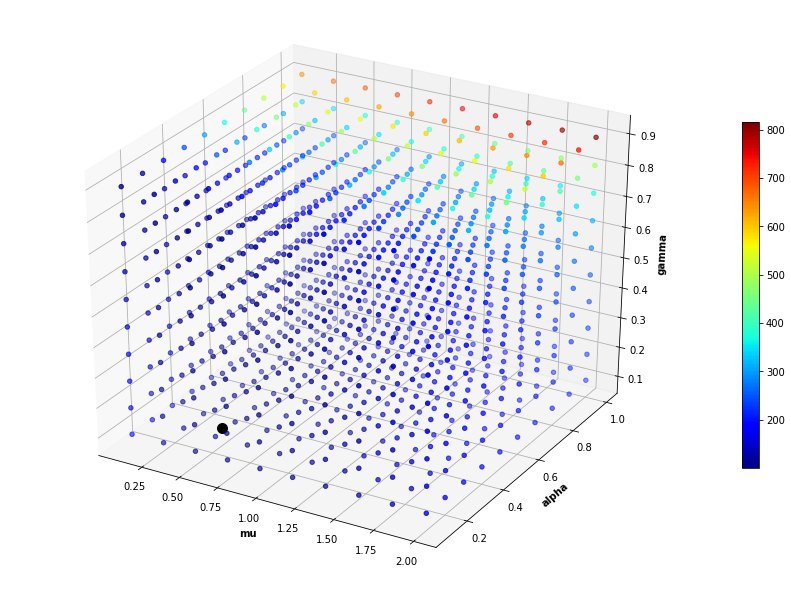

In [43]:
fig = plt.figure(figsize=(12,8))

ax = Axes3D(fig)

# mu = 1 gamma = 0.1 alpha = 0.5

AX = ax.scatter(mm, aa, gg, c= neg_log_like, cmap='jet')
ax.scatter(mu0, alpha0, gamma0, s=100, c="black")

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

plt.colorbar(AX, ax = ax, shrink = 0.6)

plt.show()

## 3D scatter for 1000 points negative log- likelihood 

In [44]:
## Generating Data 
# mu = 0.5 gamma = 0.1 alpha = 0.25

n = 1000  ## samples
rnd_seed = 4
mu0 = 0.5
gamma0 = 0.1
alpha0 = 0.25

Lambda_, data1000 = create_synthetic_data_for_loop(n, rnd_seed, mu0, gamma0, alpha0)

data1000.size

1000

In [ ]:
mu = np.linspace(0.1, 2, 25)  ## any number
alpha = np.linspace(0.1, 1, 25) # infection rate larger than 0
gamma = np.linspace(0.1, 0.9, 25)  # decay rate between 0 and 1

mm, aa, gg = np.meshgrid(mu, alpha, gamma)

## -------------------------------

## making an array for the lambdas 

l = mm.copy()

lambda_est = l - l

#lambda_est.shape ## shape = (10, 10, 10)

## ------------------------------

##lambda1 = mm  ## baseline

n = len(data1000)

l_list = [mm]  ## list for the element wise multiplication of the data points with each lambda estimate

## the first multipication of the negative log-likelihood
for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data1000[i]
    
    l_list.append(lambda_est)
    
## -----------------------------

## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data1000[i], np.log(l_list[i]))
    
    ll_list.append(vals)
    
## ------------------

## finding the negative log-likelihood function 
## by summing all 10 x 10 x 10 arrays for each multiplication and summing all 10x10x10 arrays of just lambdas  

neg_log_like =  -sum(ll_list) + sum(l_list)

neg_log_like.shape

(25, 25, 25)

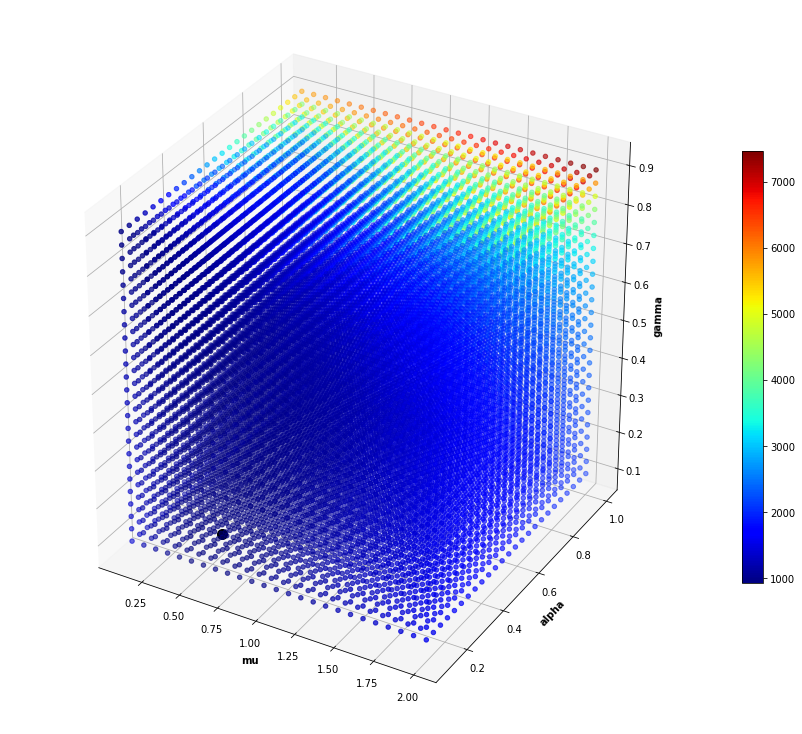

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(mu0, alpha0, gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
#ax.azim = 200
#ax.elev = -45
plt.show()

## fig.savefig('3dScatter_neg_ll_10_10.png', transparent=True,  edgecolor='none')

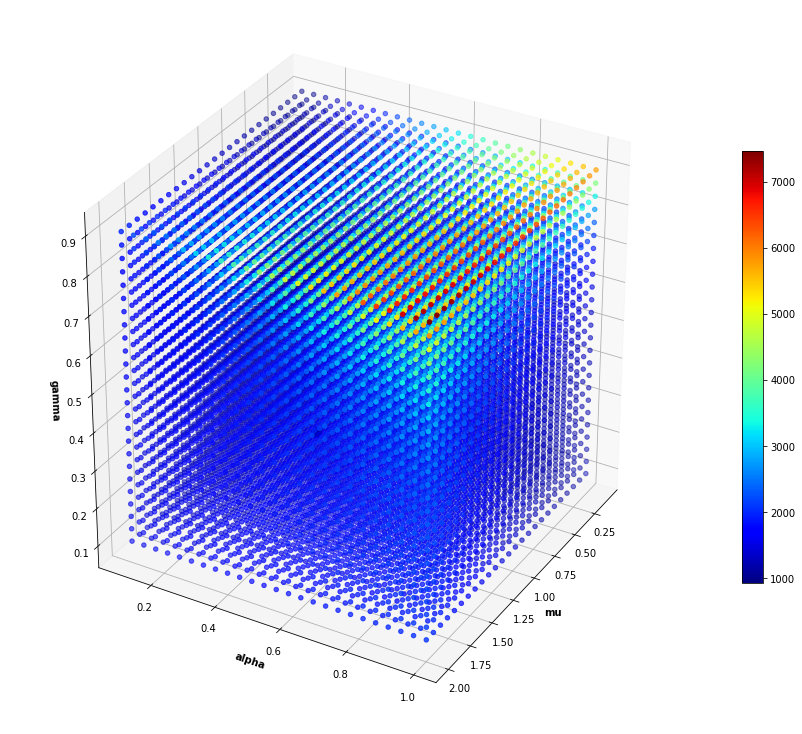

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(mu0,alpha0, gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45
plt.show()

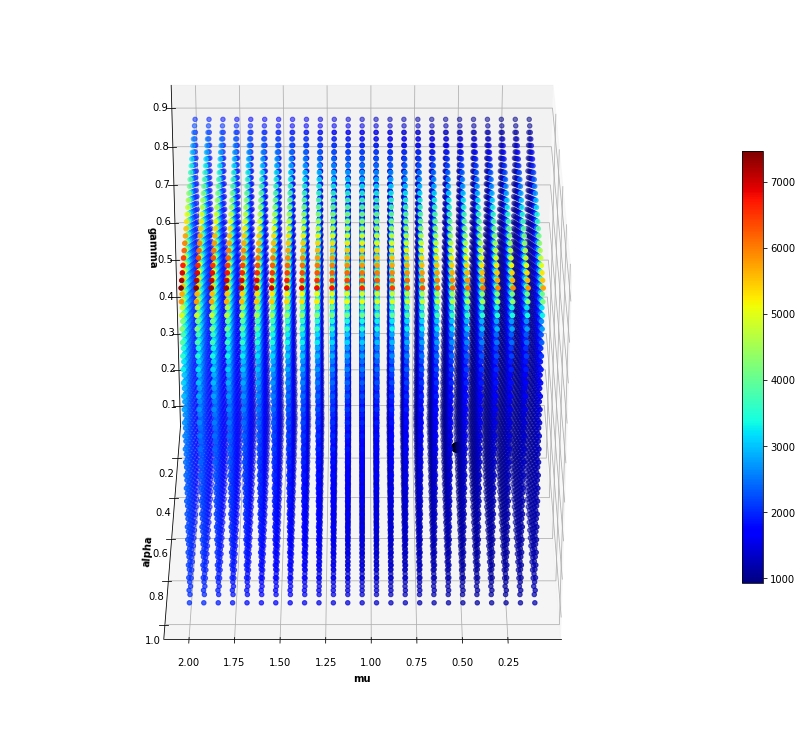

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(mu0, alpha0, gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 90
#ax.elev = -45
plt.show()

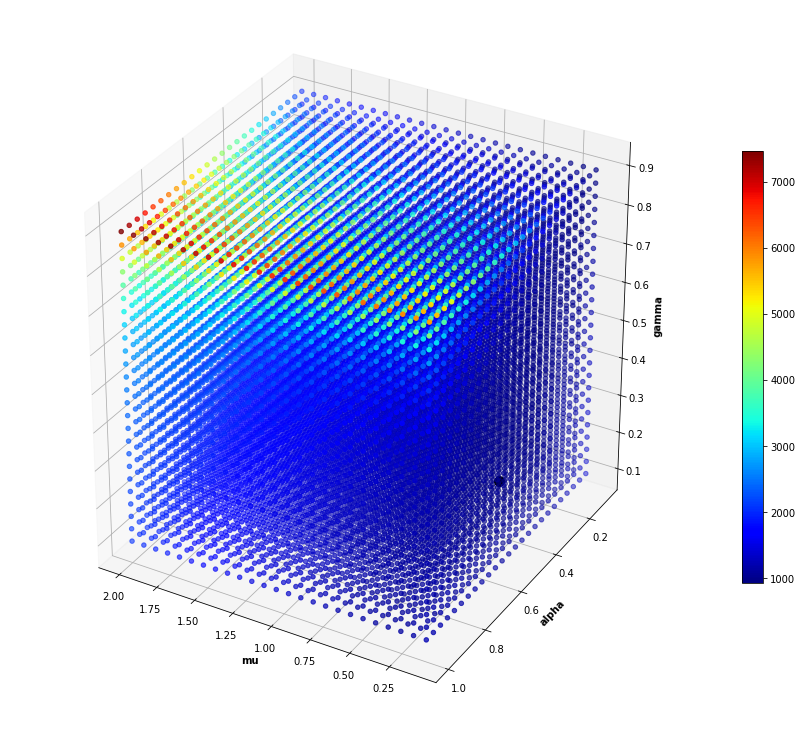

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(mu0, alpha0, gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 120
#ax.elev = -45
plt.show()

### Lmin* 1.2: 1000 data points 3D figures - finding a range of optimal values 


In [ ]:
Lmin = np.amin(neg_log_like)

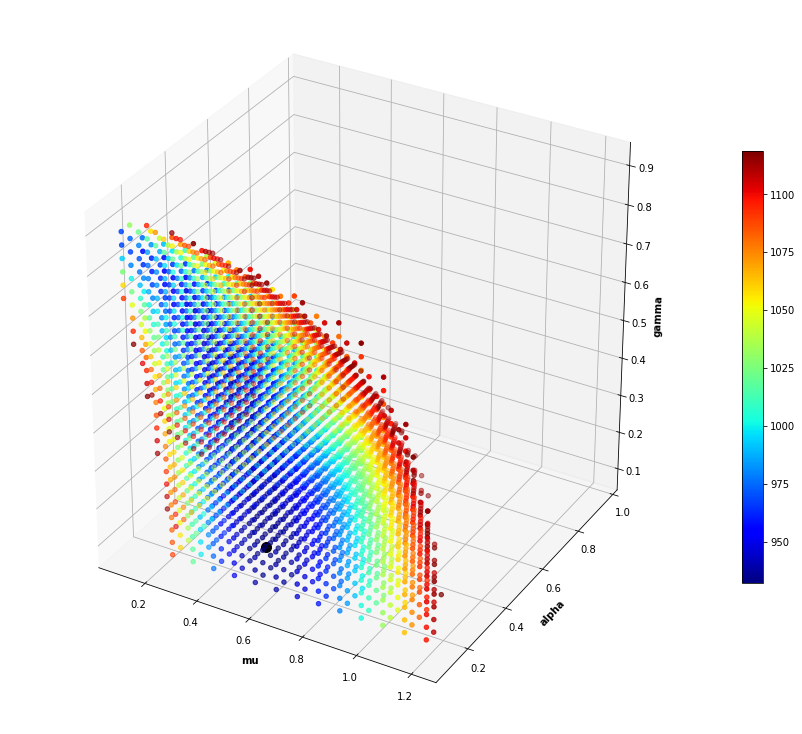

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
#ax.azim = 120
#ax.elev = -45
plt.show()

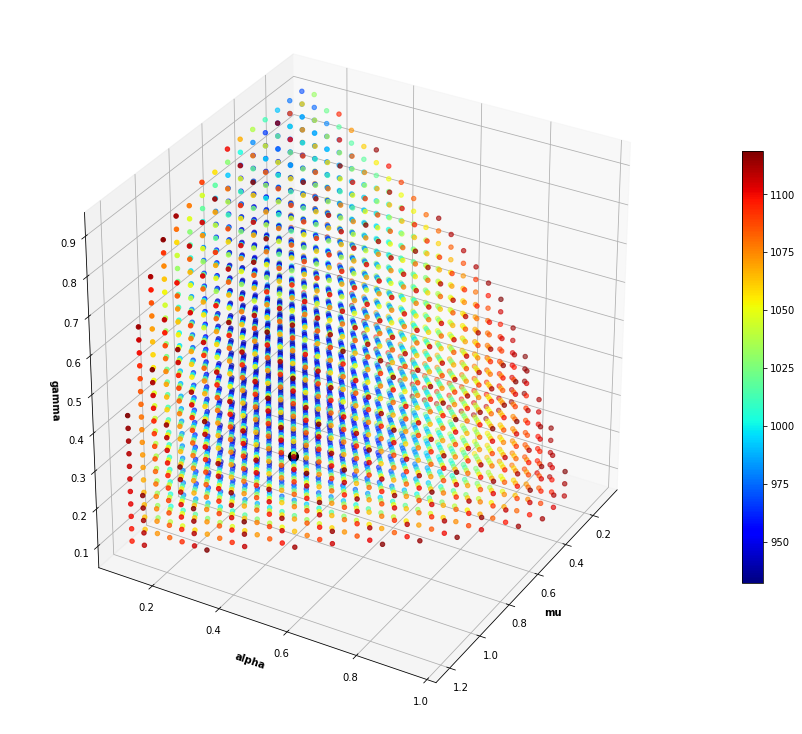

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45
plt.show()

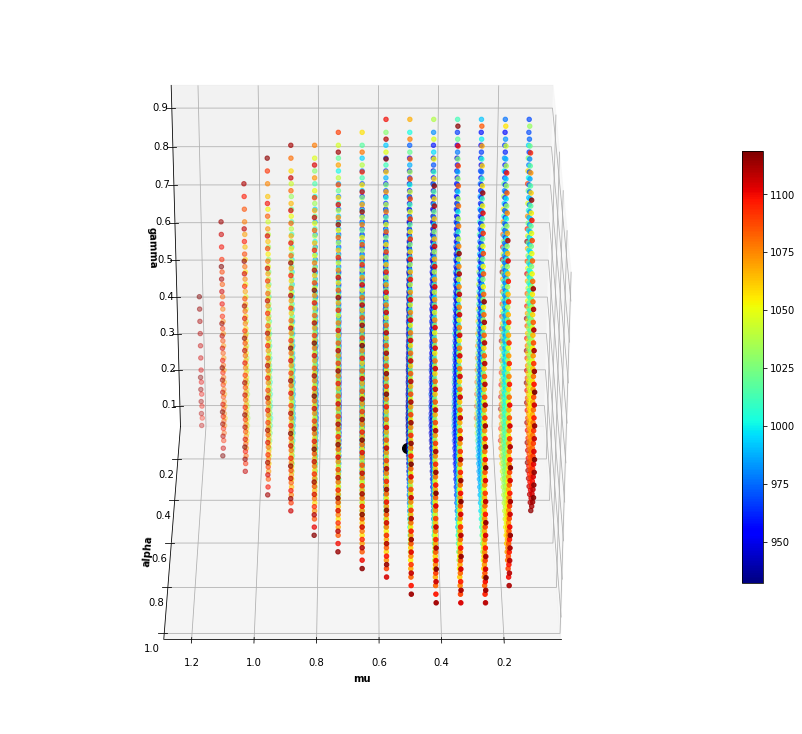

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 90
#ax.elev = -45
plt.show()

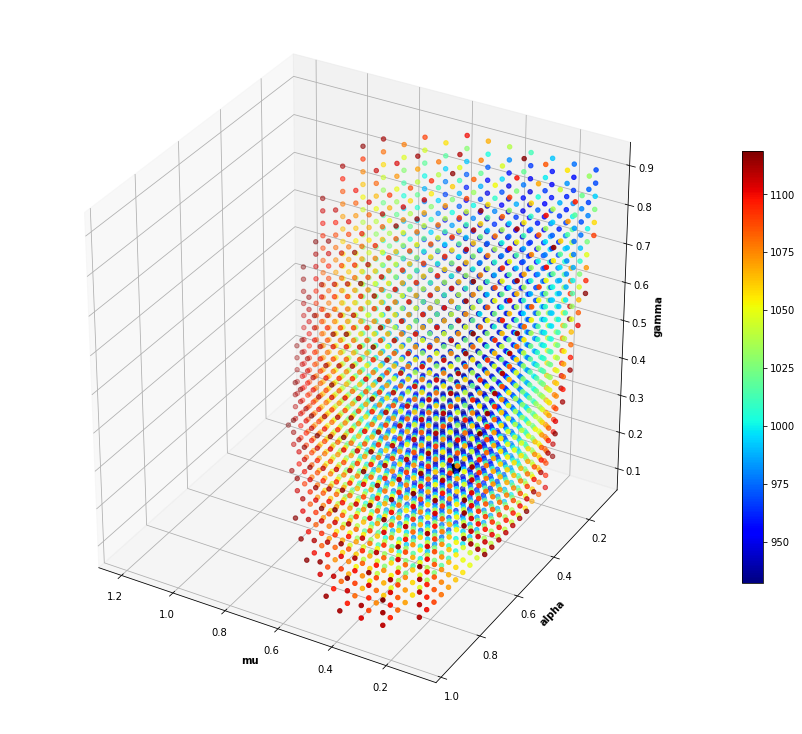

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 120
#ax.elev = -45
plt.show()

Negative log-likelihood with 5,000 data samples.

In [45]:
## Generating Data 
# mu = 0.5 gamma = 0.1 alpha = 0.25

n = 5000  ## samples
rnd_seed = 4
mu0 = 0.5
gamma0 = 0.1
alpha0 = 0.25

Lambda_, data5000 = create_synthetic_data_for_loop(n, rnd_seed, mu0, gamma0, alpha0)

data5000.size

5000

In [48]:
mu = np.linspace(0.1, 2, 25)  ## any number
alpha = np.linspace(0.1, 1, 25) # infection rate larger than 0
gamma = np.linspace(0.1, 0.9, 25)  # decay rate between 0 and 1

mm, aa, gg = np.meshgrid(mu, alpha, gamma)

## ------------

## making an array for the lambdas 

l = mm.copy()

lambda_est = l - l

#lambda_est.shape ## shape = (10, 10, 10)

## ------------

##lambda1 = mm  ## baseline

n = len(data5000)

l_list = [mm]  ## list for the element wise multiplication of the data points with each lambda estimate

## the first multipication of the negative log-likelihood
for i in range(0,n):
    
    lambda_est = np.multiply((l_list[i] - mm),gg) + mm + aa*data5000[i]
    
    l_list.append(lambda_est)
    
## -----------

## finding the negative log-likelihood function

ll_list = []

for i in range(0,n):
    
    vals = np.multiply(data5000[i], np.log(l_list[i]))
    
    ll_list.append(vals)
    
## ------------------

## finding the negative log-likelihood function 
## by summing all 10 x 10 x 10 arrays for each multiplication and summing all 10x10x10 arrays of just lambdas  

neg_log_like =  -sum(ll_list) + sum(l_list)

neg_log_like.shape

(25, 25, 25)

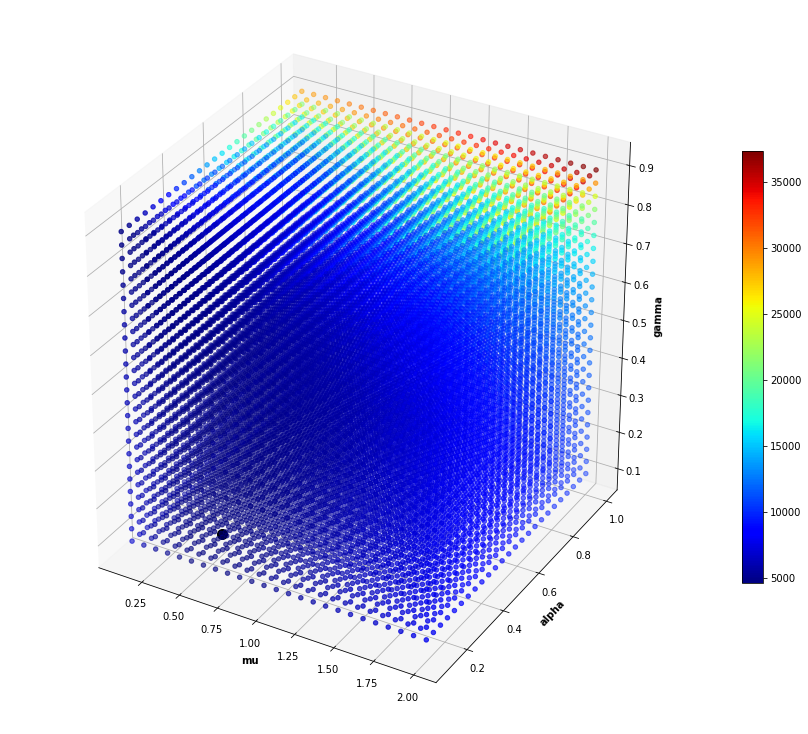

In [49]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm, aa, gg, c = neg_log_like, cmap='jet')

ax.scatter(mu0, alpha0, gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
#ax.azim = 200
#ax.elev = -45
plt.show()

In [50]:
Lmin = np.amin(neg_log_like)

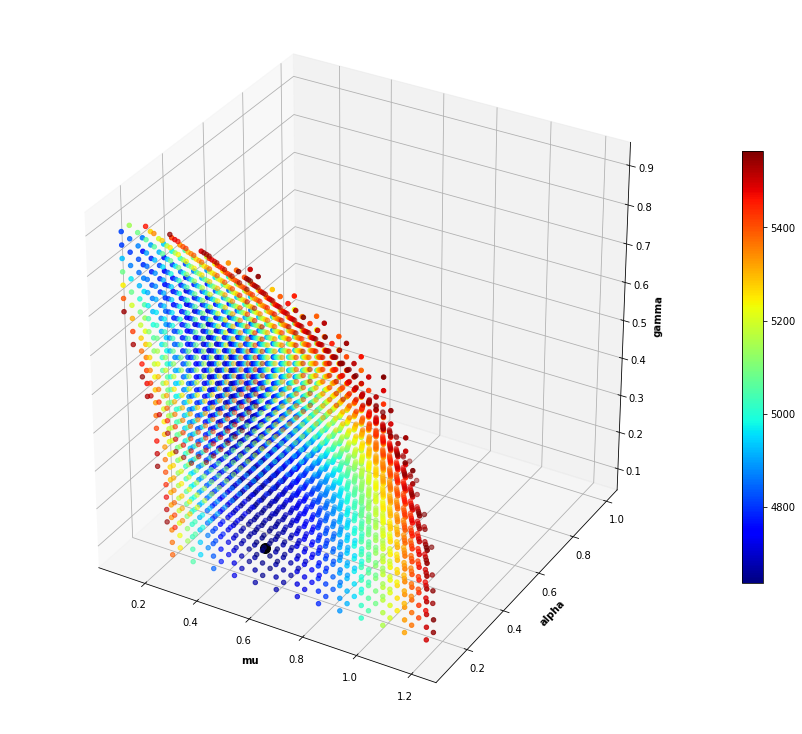

In [51]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
#ax.azim = 120
#ax.elev = -45
plt.show()

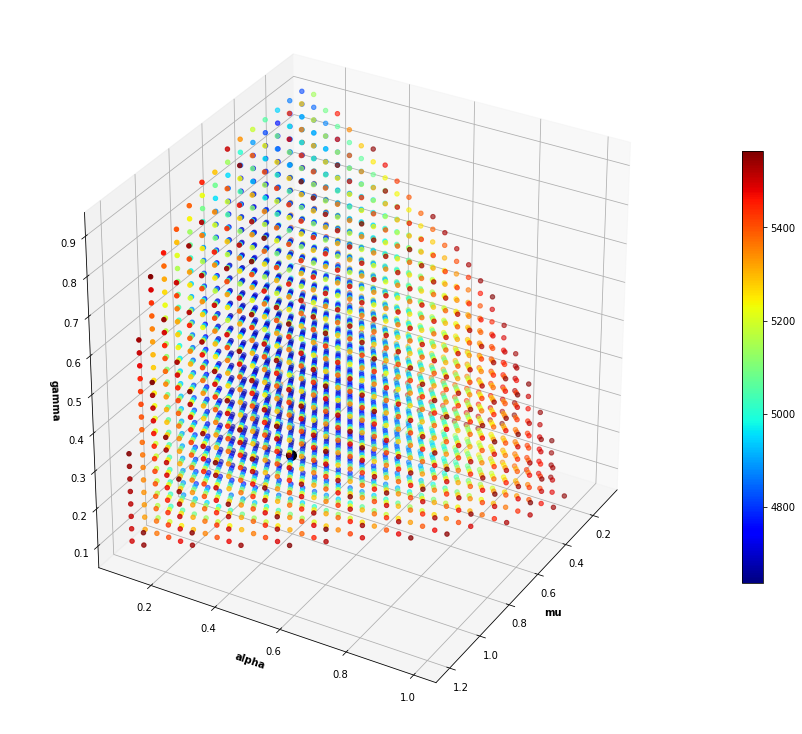

In [52]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 30
#ax.elev = -45
plt.show()

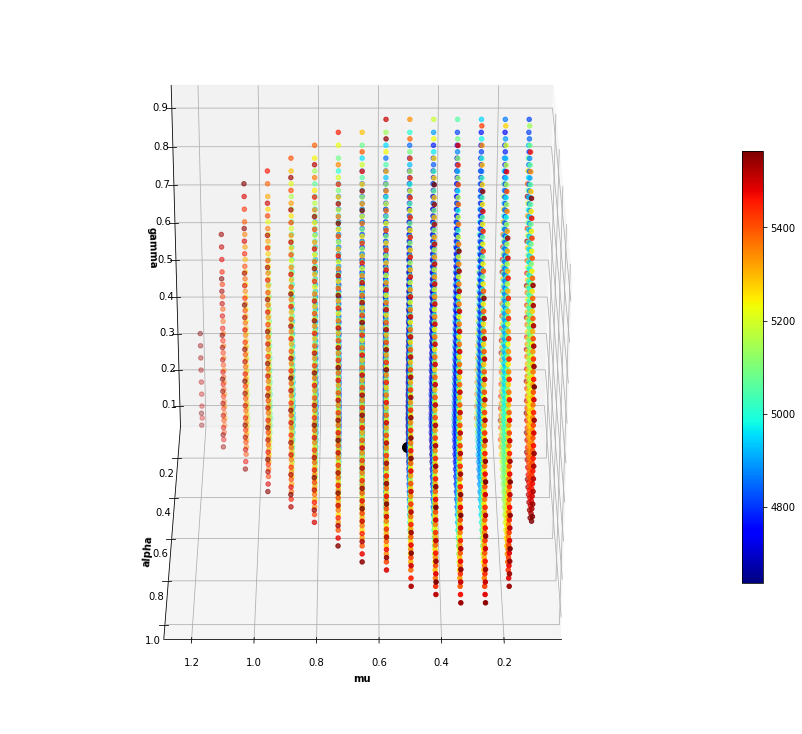

In [53]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 90
#ax.elev = -45
plt.show()

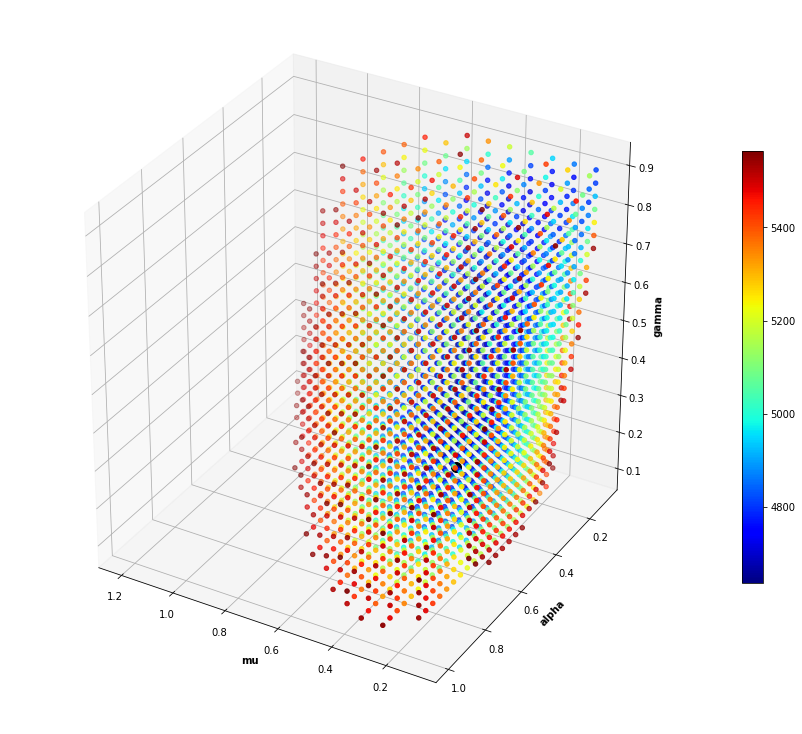

In [54]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 120
#ax.elev = -45
plt.show()

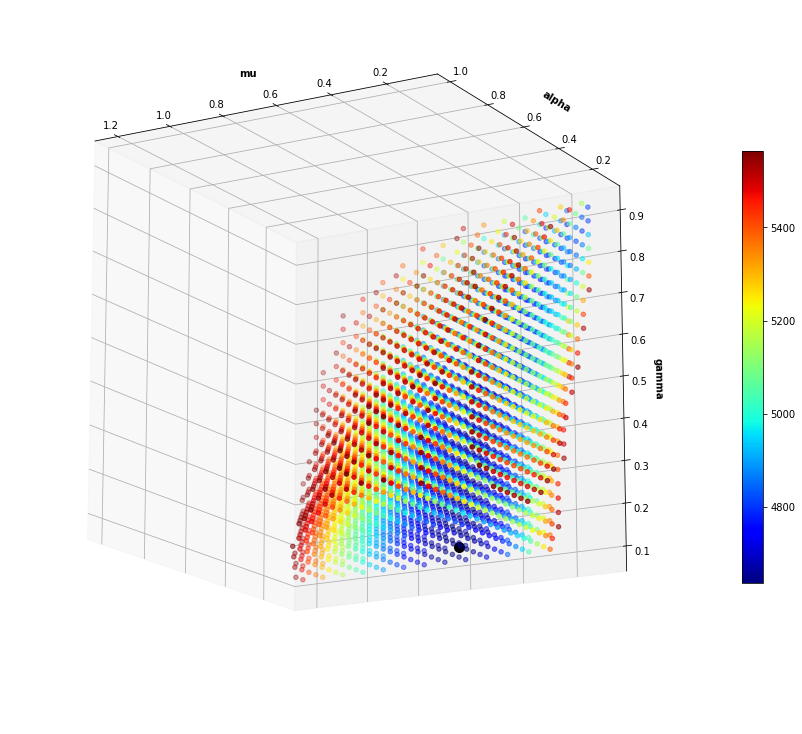

In [55]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 120
ax.elev = -15
plt.show()

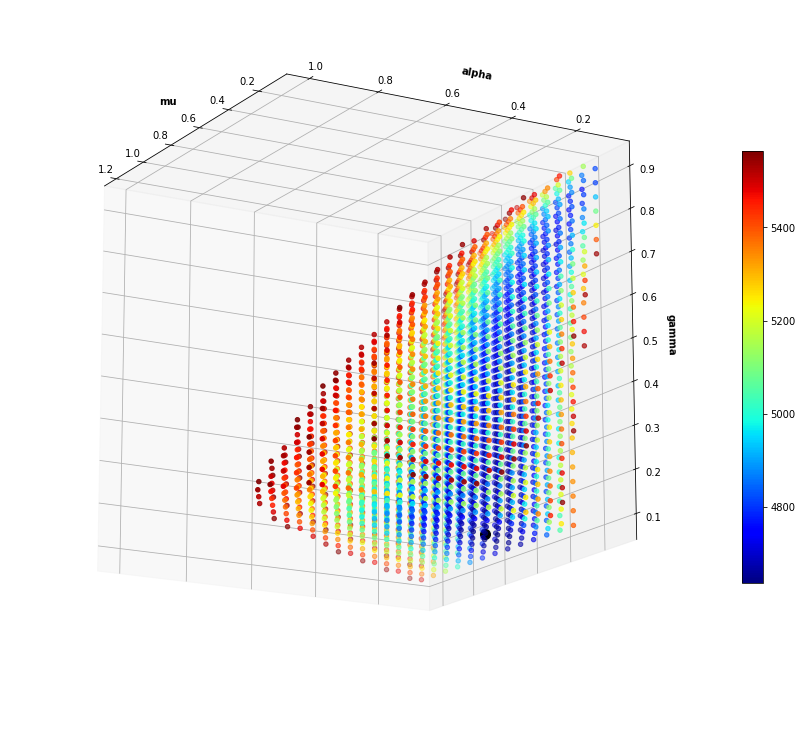

In [56]:
fig = plt.figure(figsize = (12,10))
ax = Axes3D(fig)

AX = ax.scatter3D(mm[neg_log_like < Lmin*1.2], aa[neg_log_like < Lmin*1.2], gg[neg_log_like < Lmin*1.2], c = neg_log_like[neg_log_like < Lmin*1.2], cmap='jet')

ax.scatter(mu0,alpha0,gamma0, c='black', s= 100) # plot the actual parameter point on the figure

ax.set_xlabel('mu', fontweight ='bold')
ax.set_ylabel('alpha', fontweight ='bold')
ax.set_zlabel('gamma', fontweight ='bold')

#plt.title("Negative Log-likelihood 3D scatter plot", fontweight='bold', fontsize=24)

plt.colorbar(AX, ax = ax, shrink = 0.6) 

## rotating the scatter plot
ax.azim = 150
ax.elev = -15
plt.show()

# PCA using the data5000 points

Our data is: data5000

The Lmin is found by: #Lmin = np.min(neg_log_like)

In [57]:
mm_min = mm[neg_log_like < Lmin*1.05]

aa_min = aa[neg_log_like < Lmin*1.05]

gg_min = gg[neg_log_like < Lmin*1.05]

neg_log_like_min = neg_log_like[neg_log_like < Lmin*1.05]

In [58]:
mm_min.shape

(984,)

In [59]:
import pandas as pd

In [60]:
df = pd.DataFrame(data = mm_min , columns=['mm_min']) 
df['aa_min'] = aa_min
df['gg_min'] = gg_min

df.head()

mm_min  aa_min    gg_min
0  0.100000     0.1  0.866667
1  0.100000     0.1  0.900000
2  0.179167     0.1  0.833333
3  0.179167     0.1  0.866667
4  0.179167     0.1  0.900000

In [61]:
x = df.values
# columns are mm, aa, gg
x

array([[0.1       , 0.1       , 0.86666667],
       [0.1       , 0.1       , 0.9       ],
       [0.17916667, 0.1       , 0.83333333],
       ...,
       [0.41666667, 0.55      , 0.1       ],
       [0.41666667, 0.55      , 0.13333333],
       [0.41666667, 0.55      , 0.16666667]])

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
princdf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2'])
df_target = pd.DataFrame(data=neg_log_like_min, columns=["neg_log_like_min"])
finalDf = pd.concat([princdf, df_target], axis = 1)

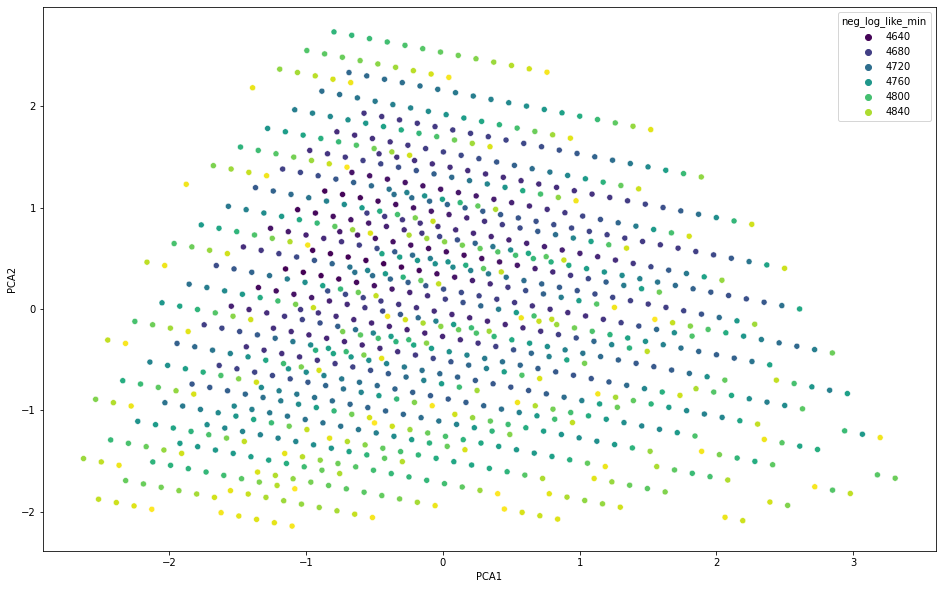

In [63]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA1", y="PCA2",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
);

In [64]:
## 3 components

x = df.values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
princdf = pd.DataFrame(data = principalComponents, columns = ['PCA1', 'PCA2', 'PCA3'])
finalDf = pd.concat([princdf, df_target], axis = 1)

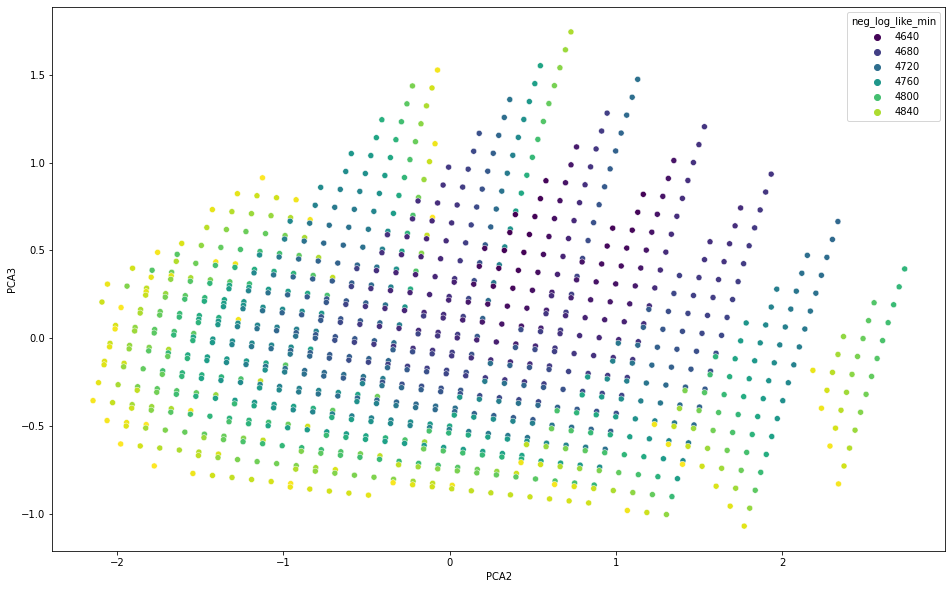

In [65]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA2", y="PCA3",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
);

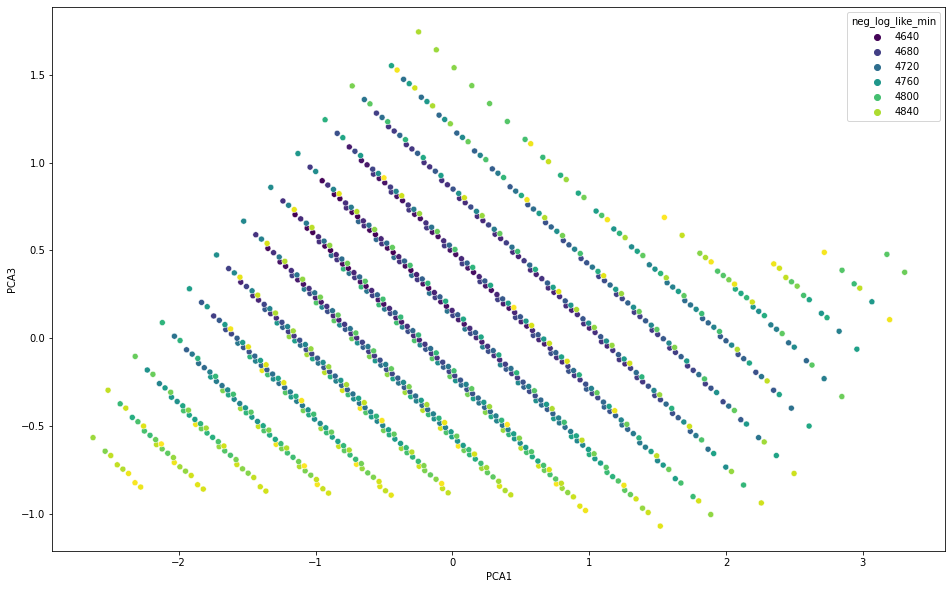

In [66]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="PCA1", y="PCA3",
    hue="neg_log_like_min",
    palette=sns.color_palette("viridis", as_cmap=True),
    data=finalDf
    # ,legend="full",
    #alpha=0.3
);

In [67]:
print('PCA Means are ', pca.mean_)
print(" ")
print('PCA Variances are ',pca.explained_variance_)
print(" ")
print("PCA Components: ", pca.components_)

PCA Means are  [-2.8883851e-16  2.8883851e-16 -2.8883851e-17]
 
PCA Variances are  [1.41714506 1.28837098 0.29753584]
 
PCA Components:  [[-0.22142741 -0.59743216  0.77074296]
 [ 0.80906495 -0.55378277 -0.19682111]
 [-0.54441143 -0.57999953 -0.60598411]]


In [68]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3'], index=df.columns)
loadings

PC1       PC2       PC3
mm_min -0.221427  0.809065 -0.544411
aa_min -0.597432 -0.553783 -0.580000
gg_min  0.770743 -0.196821 -0.605984

Axis 1 has strong positive loading for alpha, and strong negative for mu.

Axis 2 has strong positive loading for gamma, and strong negative one for mu.

Axis 3 has all negative loadings with the minimum one being the one for alpha.

# Finding the mu, alpha and gamma values

Surrogate function

$ Q(\theta |\theta^n ) = -\sum^N_{k=1} ln(\lambda_k ) \Delta N_k  +N\mu +\frac{1}{2}[ \frac{\alpha^n }{1+\gamma^n}(1+\gamma)^2 + \frac{(1+\gamma)^n}{\alpha^n}\alpha^2 ] \ (\sum^{N-2}_{i=1} \Delta N_i ) + \alpha \Delta N_{N-1} $

---

Using the MM method we made a surrogate function, which we differentiate to get:

We set * $ \phi^n_{kl} = \alpha \gamma^{k-l-1} \Delta N_l  $


$ \mu^{n+1} = \frac{1}{N} \sum^N_{k=1} \frac{ \mu^n }{\lambda_k^n} \Delta N_k $

Let 

* $ A = \frac{ 1+\gamma^n }{\alpha^n}(\sum^{N-2}_{i=1} \Delta N_i ) $
* $ B = \Delta N_{N-1}  $
* $ C =  \sum^{N}_{k=1} \sum^{k-1}_{l=1} \frac{ \phi^n_{kl} }{ \lambda_k^n } \Delta N_k  $

$ \alpha^{n+1} = \frac{ -B + \sqrt{B^2 + 4AC} }{2A} $


Let 

* $ D =  \frac{\alpha^n (\sum^{N-2}_{i=1} \Delta N_i ) }{ (1+\gamma^n )} $ 

* $ E = \sum^{N}_{k=1} \sum^{k-1}_{l=1} (k-l-1) \frac{ \phi^n_{kl} }{ \lambda_k^n } \Delta N_k  $

So 

$ \gamma^{n+1} =  \frac{D}{E - D}$

Note that the parameters are

* $ \mu > 0  $
* $ \alpha > 0 $
* $ 0 < \gamma < 1 $
